# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Narendra Kumar Vankayala </font>

# Introduction

* This notebook provides the implementation of Linear Regression from scratch
* Linear Regression is performed on the BlackFriday dataset which is taken from Kaggel.com
* I have also introduced Linear Regression using Least Sqaures and Least Mean Squares in this notebook and how we can use them to find the cost function and the weights of the Linear Regression Model


In [116]:
from IPython.display import display, Math, Latex

# Data



## Introduction to Data
* The dataset is a sample of the transactions made in a retail store on the event of Black Friday which occurs every year in the US. 
* The store wants to know better the customer purchase behaviour against different products.
* The dataset has 537,577 observations and 12 features
* The dataset contains different kinds of variables either categorial or numerical
* The value which we infer is a dependent variable(the amount of purchase) with the help of the information contained in the other variables/features.


In [117]:
import numpy as np
import pdb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D

%matplotlib inline

## Preprocessing the Data

In [118]:
#The data is stored in a csv file named "BlackFriday.csv"
df_regression = pd.read_csv("BlackFriday.csv")

In [119]:
#checking if there are any nan values in the dataset for which we found "True"
np.any(df_regression.isna())

True

In [120]:
#checking for null values in the dataset
np.any(df_regression.isnull())

True

In [121]:
#sneak peak of the datatypes of all the features in the dataset
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [122]:
#looking at the first five samples of the dataset
df_regression.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [123]:
#summary of the dataset
df_regression.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [124]:
#finding the feature names in the dataset
df_regression.columns.values

array(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase'], dtype=object)

In [125]:
#Counting the number of features in the dataset
len(df_regression.columns)

12

In [126]:
#maximum purchase in the store , minimum purchase in the store
max(df_regression['Purchase']), min(df_regression['Purchase'])

(23961, 185)

In [127]:
#checking for which columns have empty values or no values
df_regression.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [128]:
#checking for the columns which has no values and counting number of such values
df_regression.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [129]:
#The shape of the dataset
df_regression.shape

(537577, 12)

In [130]:
 df_regression.drop(columns=['User_ID', 'Product_ID'], inplace=True)

* Since the User_ID and Product_ID are not relevant to which we are predicting becuase the every sample is a trasaction obeserved at the store so we are removing the Product_ID and User_ID features from the dataset

In [131]:
#filling the empty values with 0 
df_regression.fillna(value=0, inplace=True)

In [132]:
#making the float type of product category 2 and 3 to integer type 
df_regression['Product_Category_2'] = df_regression['Product_Category_2'].astype(int)
df_regression['Product_Category_3'] = df_regression['Product_Category_3'].astype(int)

In [133]:
df_regression.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4+,0,8,0,0,7969


In [134]:
cols_to_transform = [ 'Gender', 'Stay_In_Current_City_Years','Age', 'City_Category' ]
df_with_dummies = pd.get_dummies( df_regression,columns = cols_to_transform )
df_with_dummies.info()
blackFriday_T = df_with_dummies['Purchase']
blackFriday_X = df_with_dummies.drop(columns=['Purchase'])
len(blackFriday_X.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 23 columns):
Occupation                       537577 non-null int64
Marital_Status                   537577 non-null int64
Product_Category_1               537577 non-null int64
Product_Category_2               537577 non-null int32
Product_Category_3               537577 non-null int32
Purchase                         537577 non-null int64
Gender_F                         537577 non-null uint8
Gender_M                         537577 non-null uint8
Stay_In_Current_City_Years_0     537577 non-null uint8
Stay_In_Current_City_Years_1     537577 non-null uint8
Stay_In_Current_City_Years_2     537577 non-null uint8
Stay_In_Current_City_Years_3     537577 non-null uint8
Stay_In_Current_City_Years_4+    537577 non-null uint8
Age_0-17                         537577 non-null uint8
Age_18-25                        537577 non-null uint8
Age_26-35                        537577 non-null uint8
Age_36-45

22

* PreProcessing using *_One Hot Encoding_* of the categorical data is done above
* Preparing the data
    * blackFriday_X is the features variable for our regression analysis
    * blackFriday_Y is the target varialbe for our regression analysis

## Visualization of Data

(array([ 32175.,  57237., 130109., 104444.,  79179.,  24980.,  63928.,
         13437.,  29772.,   2316.]),
 array([  185. ,  2562.6,  4940.2,  7317.8,  9695.4, 12073. , 14450.6,
        16828.2, 19205.8, 21583.4, 23961. ]),
 <a list of 10 Patch objects>)

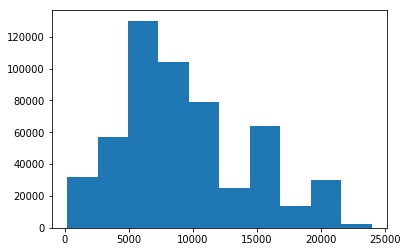

In [135]:
plt.hist(blackFriday_T)

* we can see that majority of the purchases amounts falls in between 5000 to 10000 dollars. We can also observe mean of the purchases to be $9333

(Text(0.5, 0, 'Occupation ID'), Text(0.5, 0, 'City id'))

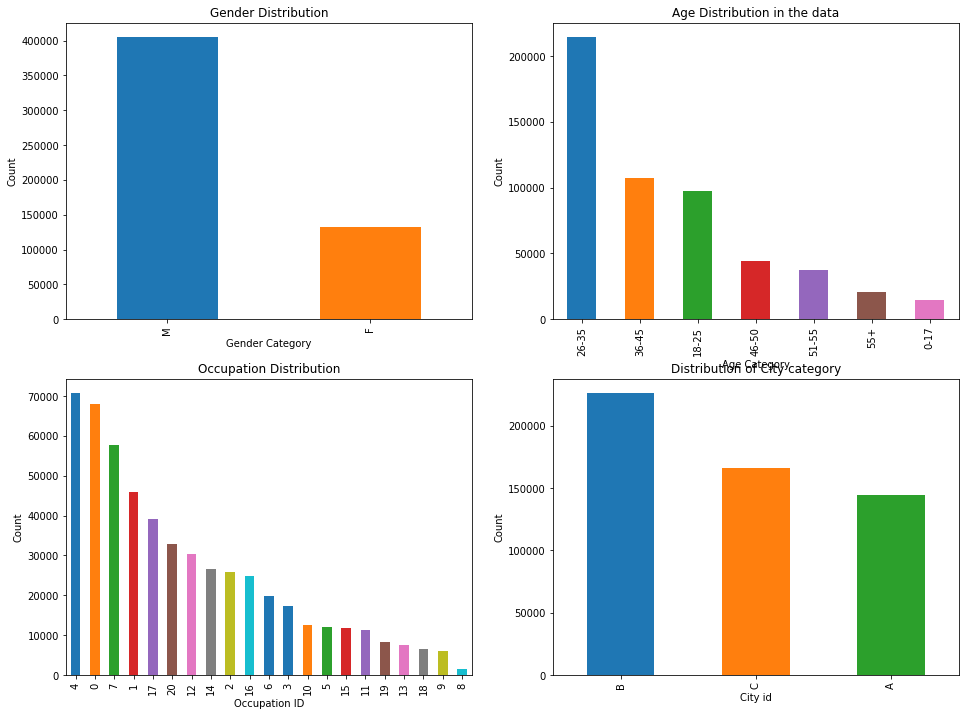

In [136]:
fig, axes = plt.subplots(nrows=2, ncols=2)

plt1 = df_regression['Gender'].value_counts().plot(ax=axes[0,0],kind='bar',title='Gender Distribution',figsize=(16,12))
df_regression['Age'].value_counts().plot(ax=axes[0,1],kind='bar',title='Age Distribution in the data',figsize=(16,12))
df_regression['Occupation'].value_counts().plot(ax=axes[1,0],kind='bar',title='Occupation Distribution',figsize=(16,12))
df_regression['City_Category'].value_counts().plot(ax=axes[1,1],kind='bar',title='Distribution of City category',figsize=(16,12))
axes[0][0].set_ylabel("Count"),axes[0][1].set_ylabel("Count")
axes[1][0].set_ylabel("Count"),axes[1][1].set_ylabel("Count")
axes[0][0].set_xlabel("Gender Category"),axes[0][1].set_xlabel("Age Category")
axes[1][0].set_xlabel("Occupation ID"),axes[1][1].set_xlabel("City id")

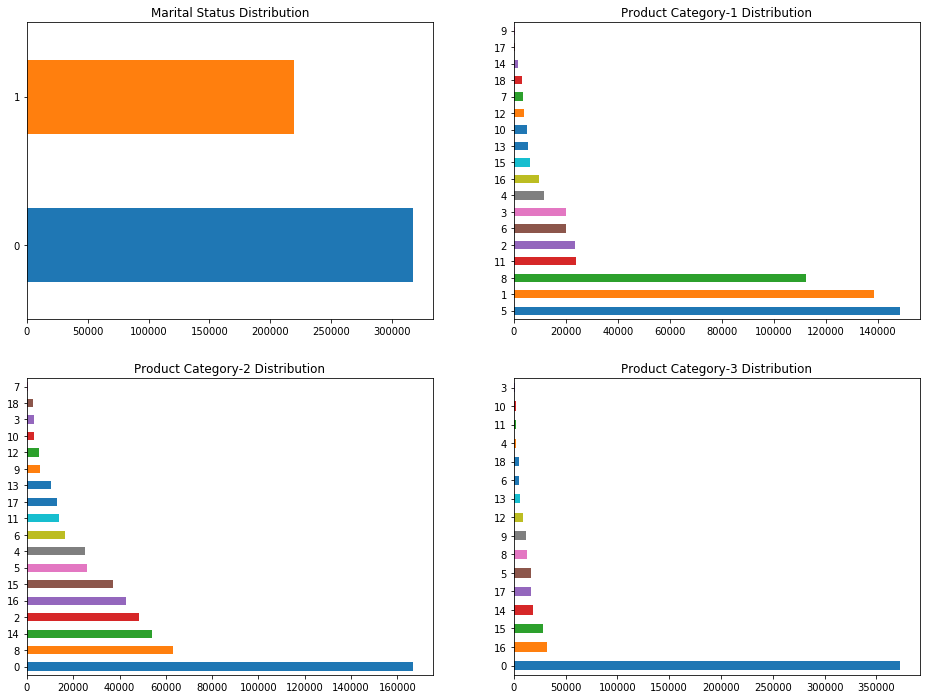

In [137]:
fig1, axes1 = plt.subplots(nrows=2, ncols=2)

df_regression['Marital_Status'].value_counts().plot(ax=axes1[0,0],kind='barh',title='Marital Status Distribution',figsize=(16,12))
df_regression['Product_Category_1'].value_counts().plot(ax=axes1[0,1],kind='barh',title='Product Category-1 Distribution',figsize=(16,12))
df_regression['Product_Category_2'].value_counts().plot(ax=axes1[1,0],kind='barh',title='Product Category-2 Distribution',figsize=(16,12))
df_regression['Product_Category_3'].value_counts().plot(ax=axes1[1,1],kind='barh',title='Product Category-3 Distribution',figsize=(16,12))

# df_regression['Stay_In_Current_City_Years'].value_counts().plot(ax=axes[2,0],kind='barh',title='Stay In Current City in Years',figsize=(16,12))

## Preliminary observation
<font color="green">* "Sample Plot title Name" - Observations Made ( This is a reference )</font>
#### The following are the observation made from the above plots
* "Gender Distribution Plot" - we can see male are in majority in the dataset 
* "Age Distribution Plot" - we can see age group (26-35) are in major in the dataset
* "Occupation Distribution Plot" - we can observe that occupation ID "4" are highest in number in the dataset and occupation id "0" are in next in number
* "City Distribution Plot" - we can see City id "B" are more in count at the store on Black Friday sales
* "Martial Status Distribution Plot" - we observe that there is more count of unmarried people at the store
* "Product Category -1 Distribution Plot" -we see that product id 5,1,8 occupy majority of the sales
* "Product Category - 2 Distribution Plot" - we found that highest number of product id is 0, which is unclassified. Since we have filled empty values as zero, we observe that in product category 2 many products which doesn't have any product id in the dataset were sold on black firday
* "Product Category -3 Distribution Plot" - we found the similar case as product category -2 which is most of the products does not have any product id were sold in major portion

# Method

## Summary of the linear models least-squares and LMS 

### Review of the linear models 
#### Least Sqaures
* In Least Squares Method, the cost function is the sum of Euclidean distances between the target values and the model outputs and we need to minimize this cost funtion to find the good fit to our model
* The square term leads the distance between the target and model outputs not biased on few samples. 
* As the error function is quadratic, this problem can be solve using by simply putting the cost function derivative to zero. 
* After solving the cost function we get the weights matrix as below 
            \wv &= \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \tv
* We directly get the weights from the above matrix and we can predict the output by training the model with the above weights
* There might the the case that inverse does not exists. So we should use Pseudo inverse while using the above matrix multiplication to find weights 
$$
\begin{align}
w &= \big(X^\top X\big)^{-1} X^\top t
\end{align}
$$

#### Least Mean Squares
* Since the Least squares can be computationally expensive especically with the large datasets, we consider sequential learning or online learning.
* During the online learning, we intro the datapoints one by one and update the weights/ parameters. 
* Using the updated parameters, the model makes a new estimation and repeat the steps.
For this, we start with an initial guess $\wv$ and changes it as it reads more data until it converges. 
When $k$ represents the steps for the repetition,

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

where $E_k$ is the error for the $k$'th sample and $\alpha$ is a learning rate. 
This is called *stochastic gradient descent* or *sequential gradient descent*. 
* After solving above we can get the following update rule for each sample
This gives the following update rule for each sample:

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$
* We use the above update rule for each of the sample in our data set passing one by one and finally we will get the best weights possible at the end. we use those weights to inference the values using this weights in the model


### Implementation and description

#### Least Squares

* In the train method defined below, I have implemented the formula of matrix multiplication that we got from our review of Least Squares method above to find the weights
* I have added the bias term using add_ones method in the base class which will add ones to the dataset 
* Since there might be possibility of matrix inverese doesn't exists at all, I used **pinv** psuedo inverse function from python to find the weights. 
* After I got the weights from the train method, I used the weights of the trained model to predict the output using use(X) method 

#### Least Mean Squares

* As we are using online learning algorithm in the least mean squares method, I have implemented Stochastic Gradient Descent here to minimize the cost function
* I have added the bias term using add_ones method in the base class which will add ones to the dataset 
* In the train_step Method, I am passing the one record at the time with the label.Using the update rule for each sample we got from the review $$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$
I have implemented this equation in the train_step method so that after each sample has been passed, we will get the updated weights
* In the train Method I am using the weights obtained from the train_step method and later sending the next sample to find the next weights 
* I have also added losses variable to keep track of the loss for every 1000 samples 
* Like wise I am passing all the data using train Method one by one. At the end, we will have the final weights or converged weights where the model fits the best as we are stochastic gradient descent with hyperparameteres alpha
* Using use Method, I am predcting the sample outputs using the weights obtained from the train_method


### Super Classs Definition

In [138]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None
#         rint("#"*100, w)

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [139]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
        
    # train lease-squares model
    def train(self, X, T):
        N = X.shape[0]
        X = self.add_ones(X)
        self.w = np.linalg.pinv(X.T @ X) @ X.T @ T
        return self.w
        
        
        
#         pass  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        yhat = X@self.w
#         print("d"*19, yhat.shape)
        return yhat
            
#         pass  ## TODO: replace this with your codes

### Least Mean Squares

In [140]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        self.losses = []
        
    
    # batch training by using train_step function
    def train(self, X, T):
        
        for i in range(len(T)):
            self.w = self.train_step(X[i], T[i])
            if(i % 10000 ==0):
                self.losses.append(np.sum((self.add_ones(X)@self.w - T)**2))
            
        return self.w
    
#     def train(self, X, T):
#         X = self.add_ones(X)
#         numIterations = 1000
#         m = len(T)
#         self.w = np.zeros(len(X[0])).reshape(-1,1)
#         print(self.w.shape, "wshape is ")
# #         print(w,"wwwwwisthis", X)
#         xTrans = X.transpose()
#         print(xTrans.shape)
#         for i in range(0, numIterations):
#             hypothesis = np.dot(X, self.w)
#             print(hypothesis.shape, T.shape, "**"*10)
#             loss = hypothesis - T
#             # avg cost per example (the 2 in 2*m doesn't really matter here.
#             # But to be consistent with the gradient, I include it)
# #             m = len(T)
#             cost = np.sum(loss ** 2) / (2 * m)
# #             print("Iteration %d | Cost: %f" % (i, cost))
#             # avg gradient per example
#             gradient = xTrans@loss / m
#             # update
# #             print(gradient.shape, "#"*10)
#             self.w = self.w - self.alpha * gradient
#         return self.w
#         pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x= np.hstack((np.ones((1)), x))
        if self.w is None:
#             x= np.hstack((np.ones((1)), x))
            self.w = np.zeros(len(x))
#         x = np.atleast_2d(x)
#         print( "^"*10,self.w, self.w.shape, x.shape)
#             self.w = np.zeros(len(x.shape[0]).reshape(-1,1)
#             print("%"*10, x.shape, self.w.shape, self.w)
        delta = x@self.w
#         print(t,'9999999')
        loss = delta - t
#         self.losses.append(loss**2)
#         print(loss)
        gradient = loss*x
#         print(gradient,'aaa')
        self.w = self.w - self.alpha*gradient
#         print(self.w,'ppp'*10)
        return self.w

            
            
        pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
#         X =np.hstack((np.ones((X.shape[0], 1)), X))
        X = self.add_ones(X)
#         X1 = np.hstack(( np.ones((N,1)), X.reshape((-1, 1))   ))
#         print(X.shape,"lmsall buddy")
#         w = self.train(X, T)
#         print(w,"weight lms")
#         print(X.shape,"   ", self.w.shape)
        yhat = X@self.w
#         print("yhat"*10,yhat.shape)
        return np.atleast_2d(yhat).T
        
        
#         pass  ## TODO: replace this with your codes
        

### Usage Examples

In [141]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

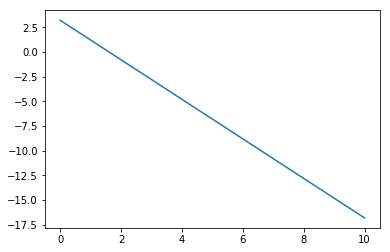

In [142]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X +3.2
# print(X)
ls = LinearRegress()
ls.train(X, T)

plt.plot(ls.use(X))

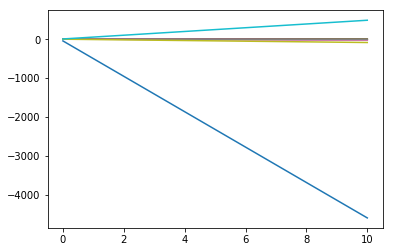

In [143]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
#     print(x.shape, t.shape)
    plt.plot(lms.use(X))
    

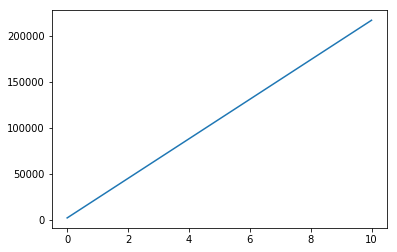

In [144]:
lms.train(X, T)
plt.plot(lms.use(X))

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [145]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
#     print(model.use(X))
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiments

### Description and Codes
* Using the LS model, I have plotted the original values and the predicted for LS
* Using the LMS model, I have plotted the original values and the predicate values for LMS
* I have also calclulated the losses for every 10000 samples and as we can see it was first very high and gradually decreasing over time
* I have also calcualted RMSE values for different values of alpha for LMS method
* I have also used rmse method to calculate RMSE values for the predicted and original values
* least squares and least mean sqaures perform similiar in our dataset



### Visualization of Results

## Least Squares Method

In [146]:
model_LS = LinearRegress()
model_LS.train(blackFriday_X.values,blackFriday_T.values)
yHat_LS = model_LS.use(blackFriday_X)
# plt.plot(yHat_LS)

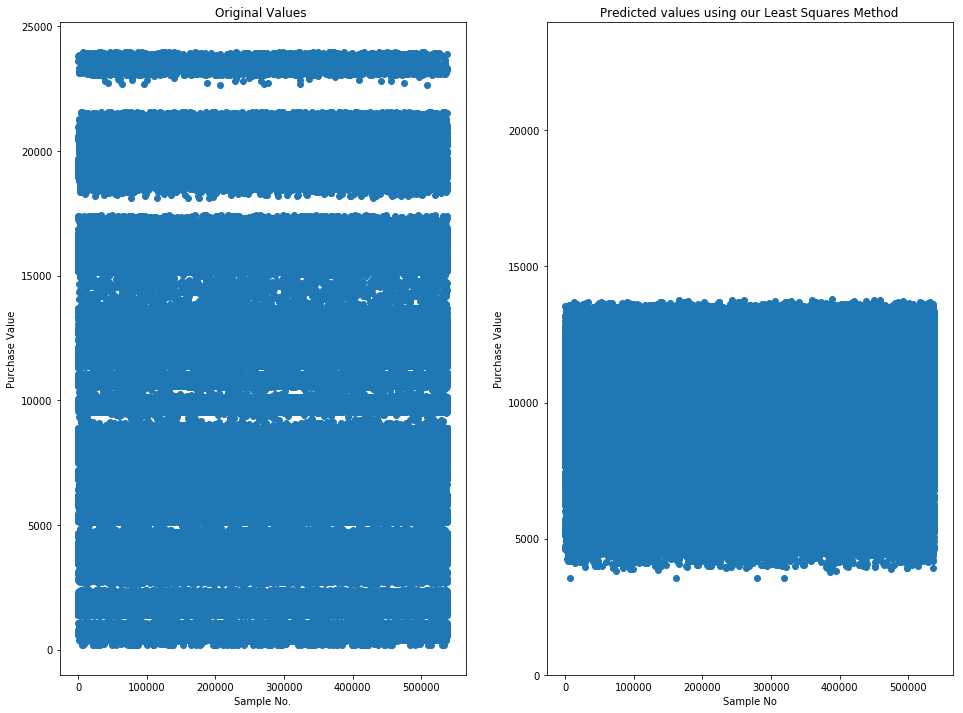

In [147]:
plt.figure(figsize=(16,12))
# plt.figure.title('Comparision of original and predicted output values using Least Squares Method')
x1 = np.array(range(len(blackFriday_T)))
x2 = np.array(range(len(blackFriday_T)))

y1 = blackFriday_T
y2 = yHat_LS

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Original Values ')
plt.xlabel('Sample No.')
plt.ylabel('Purchase Value')




plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('Predicted values using our Least Squares Method')
plt.xlabel('Sample No')
plt.ylabel('Purchase Value')
plt.ylim([0,max(blackFriday_T)])

plt.show()

In [149]:
print("Original Min and Max values in the dataset","MIN ",min(blackFriday_T), "MAX ",max(blackFriday_T),"Predicted min and max values in the dataset","MIN " ,min(yHat_LS), "MAX ",max(yHat_LS))

Original Min and Max values in the dataset MIN  185 MAX  23961 Predicted min and max values in the dataset MIN  3553.59433446809 MAX  13786.326695391906


In [150]:
model_LMS = LMS(0.001)
model_LMS.train(blackFriday_X.values, blackFriday_T.values)
yHat_LMS = model_LMS.use(blackFriday_X.values)

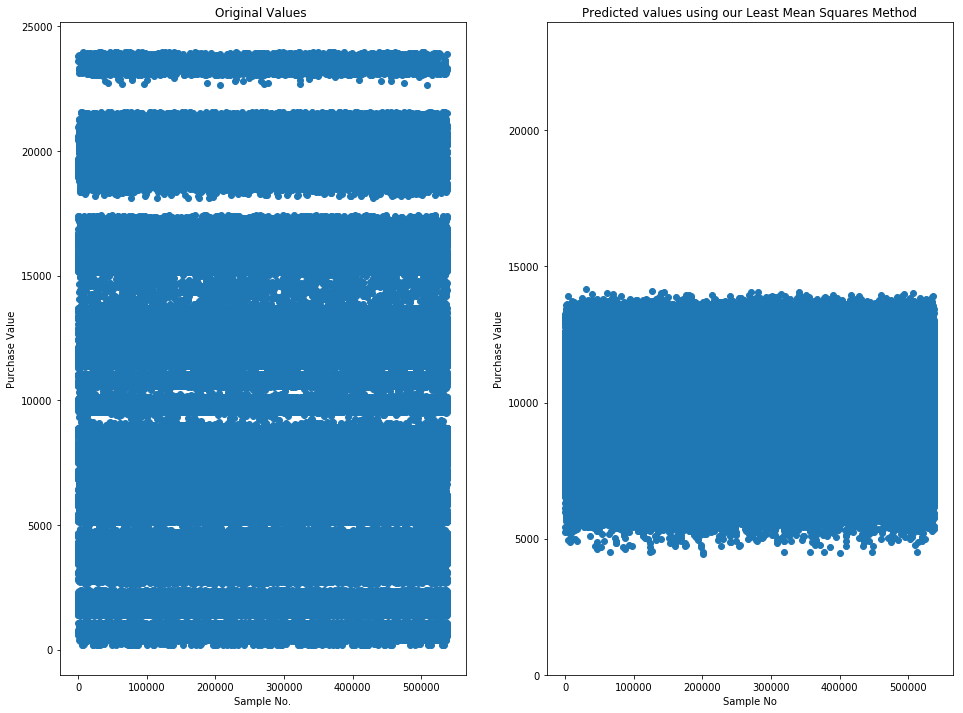

In [151]:
plt.figure(figsize=(16,12))
# plt.figure.title('Comparision of original and predicted output values using Least Squares Method')
x1 = np.array(range(len(blackFriday_T)))
x2 = np.array(range(len(blackFriday_T)))

y1 = blackFriday_T
y2 = yHat_LMS

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Original Values ')
plt.xlabel('Sample No.')
plt.ylabel('Purchase Value')




plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('Predicted values using our Least Mean Squares Method')
plt.xlabel('Sample No')
plt.ylabel('Purchase Value')
plt.ylim([0,max(blackFriday_T)])

plt.show()

## Visualization of losses

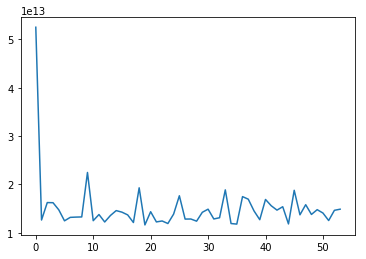

In [153]:
plt.plot(model_LMS.losses)

## Analysis and Comparision of Algorithms

In [154]:
def rmse(T, Y):
#     print(T.shape,Y.shape)
    return np.sqrt(np.sum((T-Y)**2))/len(Y)

In [155]:
rmse(blackFriday_T, yHat_LMS.ravel())

6.382644444844669

In [156]:
rmse(blackFriday_T, yHat_LS)

6.3150743411315515

In [157]:
model_LMS_alpha1 = LMS(0.01)
model_LMS.train(blackFriday_X.values, blackFriday_T.values)
yHat_LMS_alpha1 = model_LMS.use(blackFriday_X.values)

In [158]:
rmse(blackFriday_T, yHat_LMS_apha1.ravel())

6.382644943980735

In [159]:
model_LMS_alpha2 = LMS(0.1)
model_LMS.train(blackFriday_X.values, blackFriday_T.values)
yHat_LMS_alpha2 = model_LMS.use(blackFriday_X.values)

In [160]:
rmse(blackFriday_T, yHat_LMS_alpha2.ravel())

6.382644943980735

* The RMSE value calculated for LS method is 6.3150743411315515 and RMSE value for LMS method is 6.382644444844669
* Hence we can see that both the models perform almost similar for the dataset
* As we can see that the model performs almost same as LS  compared with LMS with aplha 0.01
* As we can see that the model performs almost same as LS  compared with LMS with aplha 0.1
* From the above loss graph we can see that the loss has decrased very high in the begining which is 10000 samples and then it keeps decreasing over time which proves that our algorithms is learning
* When we see the predicted values of LS and LMS we can see that both the algorithms are learning as the RMSE values for bothe algorithms are almost similar.
* The LS method may not work for huge data and if the data is such that the inverse doesnot exists, so LMS will be used for all such cases 
* The LMS using batch gradient descent also performs well with varied hyperparameters 



### Challenges
* The implementation of train_step requires the dimension match which of the input variable and target variable inthe LMS method

* The implementation of updation rule in the train step is also a challenging task.
* The implemenation of matrix multiplication in LS requires to know the difference between  inverse and psuedo inverse and implementing using python



# Conclusions
* From the plots above for LS we can see that the prediction of our model ranges between ~4k to ~14k dollars for the puchase value whereas our purchase value in the original data ranges from 187 to 24k dollars
* From the plots from above for LMS, we also see that the prediction of our model ranges from ~5k to ~14k dollars for the purchase value whereas our purchase value in the original data ranges from 187 to 24k dollars

 

# References
1. K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.
2. https://www.kaggle.com/mehdidag/black-friday

3. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html
4. https://matplotlib.org/
5. https://www.deeplearningbook.org/
6. https://en.wikibooks.org/wiki/LaTeX/Mathematics